In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


In [27]:
#2. Đọc data
df = pd.read_csv('/content/drive/MyDrive/StockData/Apple.csv')
df=df[['Close']]
df = df.dropna() #clean data
df = df.reset_index(drop=True)

#3. Chia train test
train_size = int(0.9*len(df)) #train_size là kích thước phần dữ liệu muốn lấy
test_size = int(0.1*len(df))
#val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size + test_size]
#val_data = df[train_size+test_size:]


In [28]:
#4. Training
x_train = np.array(train_data.index).reshape(-1,1) #tạo mảng Numpy x_train từ index
y_train = np.array(train_data['Close']) #mảng này chứa Close làm label cho việc huấn luyện

#Training the Linear Regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [29]:
#5. Testing
x_test = np.array(test_data.index).reshape(-1,1) # đầu vào (feature)
y_test = np.array(test_data['Close']) # đầu ra (label)

#6. Validate
#x_val = np.array(val_data.index).reshape(-1,1)
#y_val = np.array(val_data['Close'])

In [30]:
#7. Prediction
y_pred = model.predict(x_test)
#y_pred_val = model.predict(x_val)

In [31]:
#8. Tạo index predict 30 ngày tiếp theo
last_index = df.index[-1] #truy cập đến index phần tử cuối cùng
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

#Create an array of 30 consecutive intergers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1,1)

#Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

#Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[200.75706259 200.88153721 201.00601184 201.13048646 201.25496108
 201.37943571 201.50391033 201.62838496 201.75285958 201.8773342
 202.00180883 202.12628345 202.25075808 202.3752327  202.49970732
 202.62418195 202.74865657 202.8731312  202.99760582 203.12208044
 203.24655507 203.37102969 203.49550431 203.61997894 203.74445356
 203.86892819 203.99340281 204.11787743 204.24235206 204.36682668]


In [32]:
#9. Đánh giá độ chính xác validate, test
#Tính RMSE
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))

#Tính MAE, MAPE
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
#valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

#valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)

#print('Validation RMSE: ', valid_rmse)
print('Test RMSE: ', test_rmse)
#print('Validation MAE: ', valid_mae)
print('Test MAE: ', test_mae)
#print('Validation MAPE: ', valid_mape)
print('Test MAPE: ', test_mape)

Test RMSE:  13.805789540582508
Test MAE:  11.650960631513263
Test MAPE:  0.06523718239346614


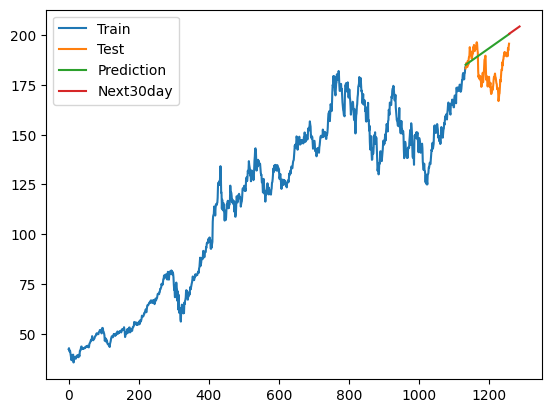

In [33]:
#10. Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
#plt.plot(val_data.index, y_pred_val)
plt.plot(last_data, y_next_30_days)
plt.legend(['Train', 'Test', 'Prediction', 'Next30day'])
plt.show()

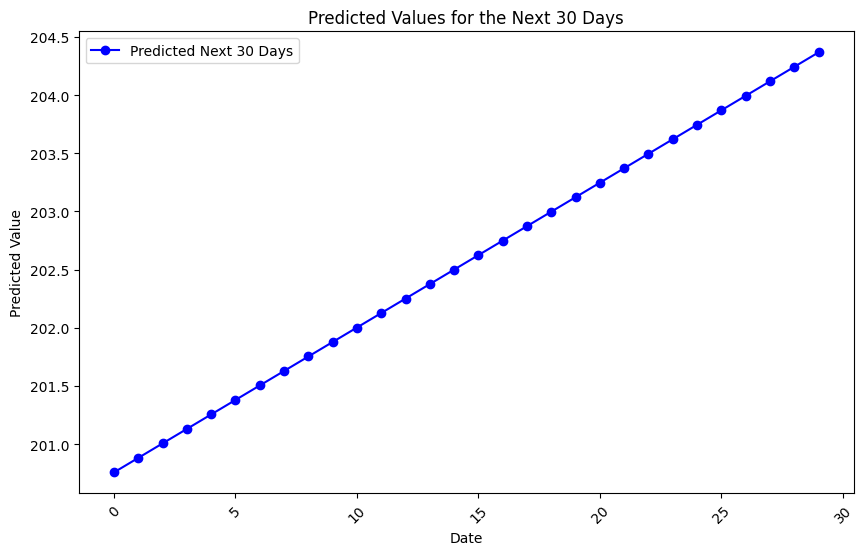

In [34]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6)) # Set the figure size
plt.plot(y_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()